# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Lecture 3 </center>

# <center>Feature Engineering</center>

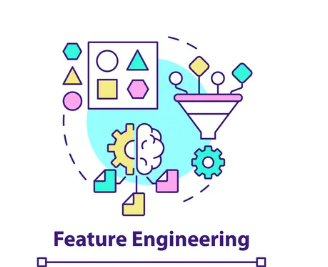

# 1. Imputing Categorical Features using sklearn

Instructions:

- Load data from loan_train.csv file. Explore to discover missing values if any.


- Use sklearn SimpleImputer to Impute the missing values with most_frequent value.



In [5]:
import pandas as pd
df = pd.read_csv("loan_train.csv")
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [6]:
df.drop(['Loan_ID'],axis = 1, inplace = True)
df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [7]:
cdf = df.select_dtypes(include = ["object"])
cdf.head()

Gender Married Dependents     Education Self_Employed Property_Area  \
0   Male      No          0      Graduate            No         Urban   
1   Male     Yes          1      Graduate            No         Rural   
2   Male     Yes          0      Graduate           Yes         Urban   
3   Male     Yes          0  Not Graduate            No         Urban   
4   Male      No          0      Graduate            No         Urban   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

In [8]:
cdf.isna().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
imputeC =SimpleImputer(strategy = "most_frequent")
data = imputeC.fit_transform(cdf)
data

array([['Male', 'No', '0', ..., 'No', 'Urban', 'Y'],
       ['Male', 'Yes', '1', ..., 'No', 'Rural', 'N'],
       ['Male', 'Yes', '0', ..., 'Yes', 'Urban', 'Y'],
       ...,
       ['Male', 'Yes', '1', ..., 'No', 'Urban', 'Y'],
       ['Male', 'Yes', '2', ..., 'No', 'Urban', 'Y'],
       ['Female', 'No', '0', ..., 'Yes', 'Semiurban', 'N']], dtype=object)

In [12]:
catedf = pd.DataFrame(data,columns = cdf.columns)
catedf

Gender Married Dependents     Education Self_Employed Property_Area  \
0      Male      No          0      Graduate            No         Urban   
1      Male     Yes          1      Graduate            No         Rural   
2      Male     Yes          0      Graduate           Yes         Urban   
3      Male     Yes          0  Not Graduate            No         Urban   
4      Male      No          0      Graduate            No         Urban   
..      ...     ...        ...           ...           ...           ...   
609  Female      No          0      Graduate            No         Rural   
610    Male     Yes         3+      Graduate            No         Rural   
611    Male     Yes          1      Graduate            No         Urban   
612    Male     Yes          2      Graduate            No         Urban   
613  Female      No          0      Graduate           Yes     Semiurban   

    Loan_Status  
0             Y  
1             N  
2             Y  
3             Y  
4             Y  
..          ...  
609           Y  
610           Y  
611           Y  
612           Y  
613           N  

[614 rows x 7 columns]

In [13]:
catedf.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

# 2. Encoding Categorical Features

### 2.1. Encoding Nominal Features

Instructions:

- Explore data and discover nominal features.


- Use one-hot encoding technique to encode nominal features.

In [16]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
result = ohe.fit_transform(catedf[['Gender','Married','Self_Employed']]).toarray()
result

array([[0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0., 1.]])

In [19]:
ohe.get_feature_names()

array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_No', 'x2_Yes'],
      dtype=object)

In [23]:
df1 = pd.DataFrame(result,columns = ohe.get_feature_names())
df1

x0_Female  x0_Male  x1_No  x1_Yes  x2_No  x2_Yes
0          0.0      1.0    1.0     0.0    1.0     0.0
1          0.0      1.0    0.0     1.0    1.0     0.0
2          0.0      1.0    0.0     1.0    0.0     1.0
3          0.0      1.0    0.0     1.0    1.0     0.0
4          0.0      1.0    1.0     0.0    1.0     0.0
..         ...      ...    ...     ...    ...     ...
609        1.0      0.0    1.0     0.0    1.0     0.0
610        0.0      1.0    0.0     1.0    1.0     0.0
611        0.0      1.0    0.0     1.0    1.0     0.0
612        0.0      1.0    0.0     1.0    1.0     0.0
613        1.0      0.0    1.0     0.0    0.0     1.0

[614 rows x 6 columns]

### 2.2. Encoding Ordinal Features

Instructions:

- Explore data and discover all ordinal features


- Use OrdinalEncoder to encode ordinal Features

In [20]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
o_result = oe.fit_transform(catedf[["Education","Property_Area"]])
o_result

array([[0., 2.],
       [0., 0.],
       [0., 2.],
       ...,
       [0., 2.],
       [0., 2.],
       [0., 1.]])

### 2.3. Label Encoder

Instructions:

- Use LabelEncoder to encode target feature.


- Analyze the difference between Ordinal Encoder and Label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Target = le.fit_transform(catedf.Loan_Status)
Target

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
ml_df = pd.concat(['result','o_result','Target'])
ml_df